In [2]:
#Fake News Detection using machhne Learning

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
import pickle

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\J.S. CAITLYN
[nltk_data]     MARY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [4]:
#Dta Preprocessing

In [5]:
df=pd.read_csv("train.csv")

In [6]:
df.shape

(20800, 5)

In [7]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
# counting the number of missing values in the dataset
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# replacing the null values with empty string
df = df.fillna('')

In [10]:
df['content']= df['author']+' '+df['title']

In [11]:
print(df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [12]:
#separating the data & label
X=df.drop(columns='label',axis=1)
Y=df['label']

In [13]:
print(X)


          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [14]:
print(Y)

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


### Stemming:

### Stemming is the process of reducing a word to its Root word

### example: actor, actress, acting --> act

In [15]:
port_stem = PorterStemmer()

In [16]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [17]:
df['content'] = df['content'].apply(stemming)

In [18]:
print(df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [19]:
#separating the data and label
X = df['content'].values
Y = df['label'].values

In [20]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [21]:
print(Y)

[1 0 1 ... 0 1 1]


In [22]:
Y.shape

(20800,)

In [23]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [24]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

### LOGISTIC REGRESSION

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, Y_train)

LogisticRegression()

In [29]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [31]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


In [33]:
# Classification report on test data
print("Classification Report:\n", classification_report(Y_test, X_test_prediction))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix for Test Data (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'])
plt.yticks(ticks=[0, 1], labels=['Real', 'Fake'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.colorbar()
plt.show()

NameError: name 'confusion_matrix' is not defined

### (2) Random forest


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [107]:
# Initialize the Random Forest Classifier
rmodel = RandomForestClassifier(n_estimators=100, random_state=42) 

In [108]:
# Fit the model
rmodel.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [109]:
# Accuracy score on the training data
X_train_prediction = rmodel.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data (Random Forest): ', training_data_accuracy)

Accuracy score of the training data (Random Forest):  1.0


In [110]:
# Accuracy score on the test data
X_test_prediction = rmodel.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data (Random Forest): ', test_data_accuracy)

Accuracy score of the test data (Random Forest):  0.9935096153846154


In [111]:
# Classification report on test data
print("Classification Report of RF:\n", classification_report(Y_test, X_test_prediction))

Classification Report of RF:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2077
           1       0.99      1.00      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



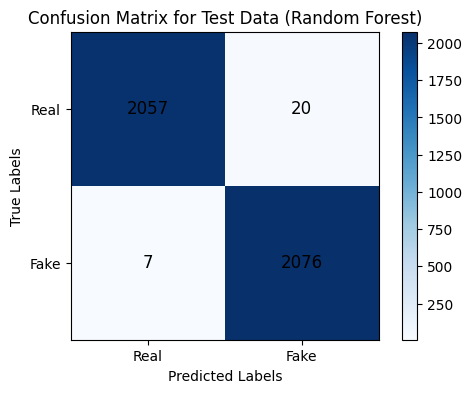

In [112]:
# Confusion Matrix for the test data
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plotting the confusion matrix using Matplotlib
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues')

# Adding titles and labels
plt.title('Confusion Matrix for Test Data (Random Forest)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adding tick labels
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'])
plt.yticks(ticks=[0, 1], labels=['Real', 'Fake'])

# Adding text annotations for each cell
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

# Show the plot
plt.colorbar()
plt.show()

In [ ]:
X_new= X_test[1]

prediction =model.predict(X_new)
print(prediction)

if(prediction[0]==0):
    print(" The news is real")
else:
    print("The news is Fake")

In [43]:
print(Y_test[1])

0


### (3) Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Initialize the Decision Tree Classifier
model_dt = DecisionTreeClassifier(random_state=42)

In [46]:
# Fit the model
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [47]:
# Accuracy score on the training data
X_train_prediction = model_dt.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data (Decision Tree): ', training_data_accuracy)

Accuracy score of the training data (Decision Tree):  1.0


In [48]:

# Accuracy score on the test data
X_test_prediction = model_dt.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data (Decision Tree): ', test_data_accuracy)

Accuracy score of the test data (Decision Tree):  0.9918269230769231


In [49]:
# Classification report on test data
print("Classification Report of DT:\n", classification_report(Y_test, X_test_prediction))

Classification Report of DT:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



### (4) PassiveAgressive classifier

In [131]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [132]:
pmodel = PassiveAggressiveClassifier(max_iter=1000, random_state=43, tol=1e-3)  # Decrease tolerance


In [133]:
pmodel.fit(X_train, Y_train)

PassiveAggressiveClassifier(random_state=43)

In [134]:

# Accuracy score on the training data
X_train_prediction = pmodel.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [135]:
# Accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


In [136]:
# Classification report on test data
print("Classification Report (PA):\n", classification_report(Y_test, X_test_prediction))

Classification Report (PA):
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



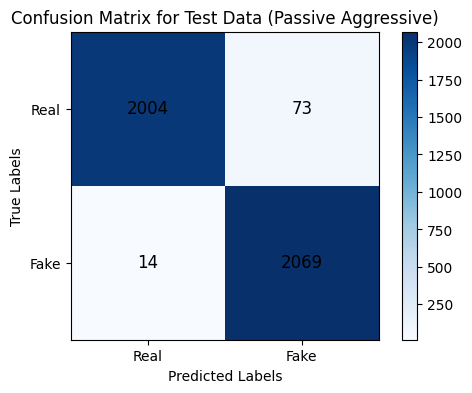

In [137]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix for Test Data (Passive Aggressive)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'])
plt.yticks(ticks=[0, 1], labels=['Real', 'Fake'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.colorbar()
plt.show()

### (5) KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
model_knn = KNeighborsClassifier(n_neighbors=1)

In [140]:

# Fit the model
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [141]:

# Accuracy score on the training data
X_train_prediction = model_knn.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data (KNN): ', training_data_accuracy)

Accuracy score of the training data (KNN):  1.0


In [142]:

# Accuracy score on the test data
X_test_prediction = model_knn.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data (KNN): ', test_data_accuracy)

Accuracy score of the test data (KNN):  0.5865384615384616


In [145]:

# Classification report on test data
print("Classification Report (kNN):\n", classification_report(Y_test, X_test_prediction))

Classification Report (kNN):
               precision    recall  f1-score   support

           0       1.00      0.17      0.29      2077
           1       0.55      1.00      0.71      2083

    accuracy                           0.59      4160
   macro avg       0.77      0.59      0.50      4160
weighted avg       0.77      0.59      0.50      4160



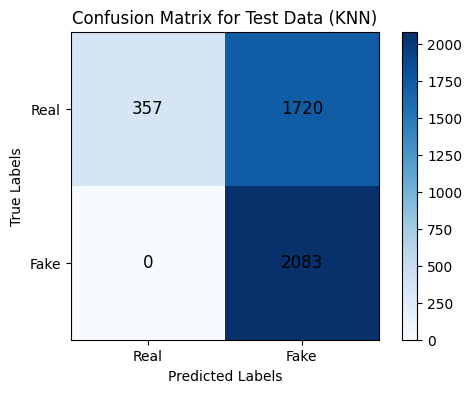

In [144]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix for Test Data (KNN)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'])
plt.yticks(ticks=[0, 1], labels=['Real', 'Fake'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.colorbar()
plt.show()

### 6) Navie Byes

In [153]:
from sklearn.naive_bayes import MultinomialNB

In [154]:
# Initialize the Naive Bayes Classifier
model_nb = MultinomialNB()

In [155]:
# Fit the model
model_nb.fit(X_train, Y_train)

MultinomialNB()

In [156]:
# Accuracy score on the training data
X_train_prediction = model_nb.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data (Naive Bayes): ', training_data_accuracy)

Accuracy score of the training data (Naive Bayes):  0.9782451923076924


In [157]:
# Accuracy score on the test data
X_test_prediction = model_nb.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data (Naive Bayes): ', test_data_accuracy)

Accuracy score of the test data (Naive Bayes):  0.9550480769230769


In [158]:

# Classification report on test data
print("Classification Report (SVM):\n", classification_report(Y_test, X_test_prediction))

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      2077
           1       0.99      0.92      0.95      2083

    accuracy                           0.96      4160
   macro avg       0.96      0.96      0.95      4160
weighted avg       0.96      0.96      0.95      4160



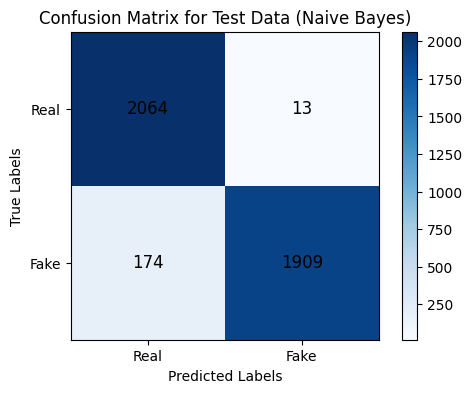

In [152]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix for Test Data (Naive Bayes)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'])
plt.yticks(ticks=[0, 1], labels=['Real', 'Fake'])

for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.colorbar()
plt.show()

### 7) SVM

In [68]:
from sklearn.svm import SVC

In [69]:
# Initialize the Support Vector Classifier (SVM)
model_svm = SVC(kernel='linear', random_state=50)

In [70]:
# Fit the model
model_svm.fit(X_train, Y_train)

SVC(kernel='linear', random_state=50)

In [71]:
# Accuracy score on the training data
X_train_prediction = model_svm.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data (SVM): ', training_data_accuracy)

Accuracy score of the training data (SVM):  0.9974158653846154


In [72]:
# Accuracy score on the test data
X_test_prediction = model_svm.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the test data (SVM): ', test_data_accuracy)

Accuracy score of the test data (SVM):  0.9913461538461539


In [73]:

# Classification report on test data
print("Classification Report (SVM):\n", classification_report(Y_test, X_test_prediction))

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



In [74]:
with open('rmodel', 'wb') as file:
    pickle.dump(rmodel, file) 

In [75]:
with open('vector.pkl', 'wb') as file:
    pickle.dump(vectorizer, file) 

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
# Load your dataset (replace 'your_dataset.csv' with the actual path to your dataset)
df = pd.read_csv('train.csv')

In [89]:
# Count the occurrences of each label (FAKE and REAL)
label_counts = df['label'].value_counts()

<Axes: >

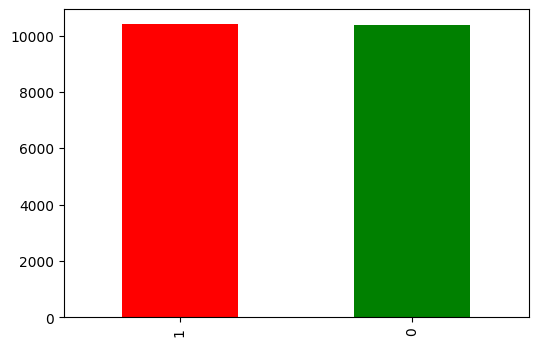

In [90]:
# Plotting the bar graph
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['red', 'green'])

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

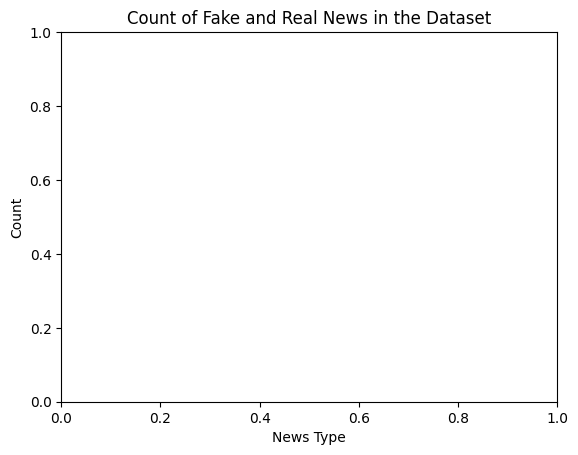

In [91]:
# Adding titles and labels
plt.title('Count of Fake and Real News in the Dataset')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

In [92]:
# Show the plot
plt.show()

   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
1    10413
0    10387
Name: label, dtype: int64


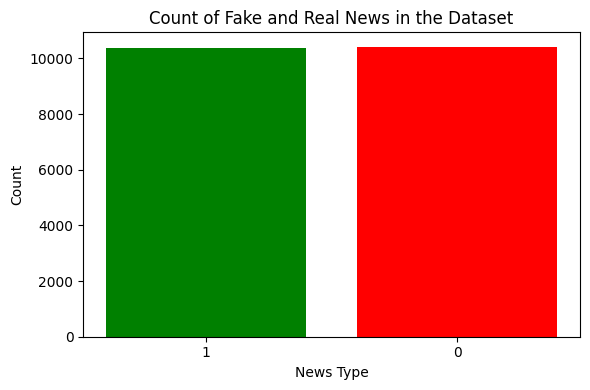

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is a pandas DataFrame called df
# And the column 'label' contains 'FAKE' for fake news and 'REAL' for real news

# Load your dataset (replace 'your_dataset.csv' with the actual path to your dataset)
df = pd.read_csv('train.csv')

# Display the first few rows to check the dataset
print(df.head())

# Count the occurrences of each label (FAKE and REAL)
label_counts = df['label'].value_counts()

# Print label counts to confirm
print(label_counts)

# Plotting the bar graph
plt.figure(figsize=(6, 4))

# Plot the bar chart with corrected axis handling
plt.bar(label_counts.index, label_counts.values, color=['red', 'green'])

# Adding titles and labels
plt.title('Count of Fake and Real News in the Dataset')
plt.xlabel('News Type')
plt.ylabel('Count')

# Ensure the correct ticks on x-axis
plt.xticks(ticks=[0, 1], labels=label_counts.index, rotation=0)

# Show the plot
plt.tight_layout()  # To make sure everything fits without overlapping
plt.show()


   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
1    10413
0    10387
Name: label, dtype: int64


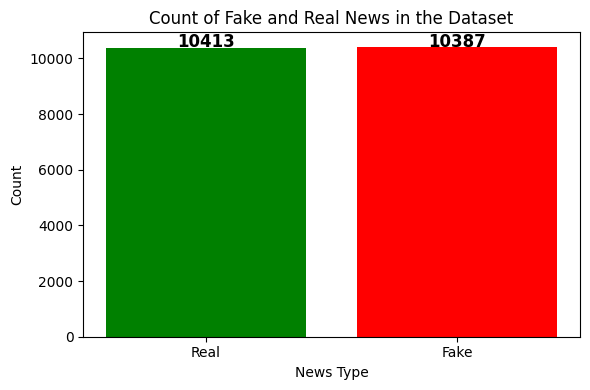

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is a pandas DataFrame called df
# And the column 'label' contains 0 for real news and 1 for fake news

# Load your dataset (replace 'your_dataset.csv' with the actual path to your dataset)
df = pd.read_csv('train.csv')

# Display the first few rows to check the dataset
print(df.head())

# Count the occurrences of each label (0 for real, 1 for fake)
label_counts = df['label'].value_counts()

# Print label counts to confirm
print(label_counts)

# Plotting the bar graph
plt.figure(figsize=(6, 4))

# Plot the bar chart with corrected axis handling
plt.bar(label_counts.index, label_counts.values, color=['red', 'green'])

# Adding titles and labels
plt.title('Count of Fake and Real News in the Dataset')
plt.xlabel('News Type')
plt.ylabel('Count')

# Annotate each bar with the total count
for i, count in enumerate(label_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12, fontweight='bold')

# Ensure the correct labels on the x-axis (0 = Real, 1 = Fake)
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'], rotation=0)

# Show the plot
plt.tight_layout()  # To make sure everything fits without overlapping
plt.show()


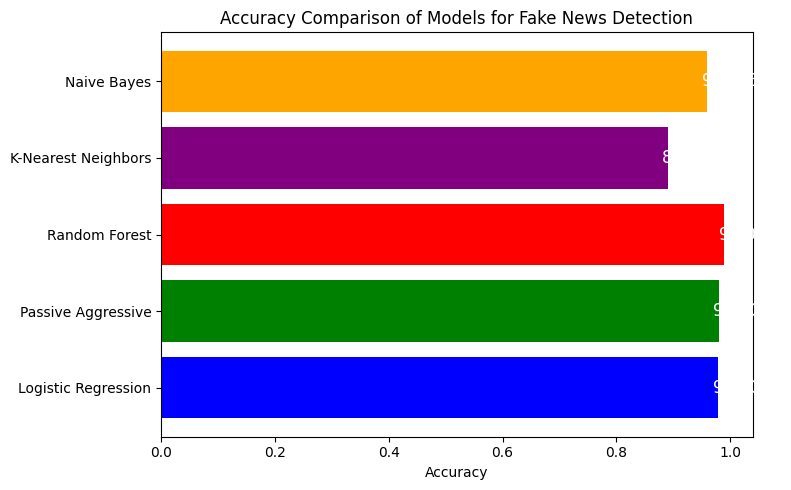

In [159]:
import matplotlib.pyplot as plt

# Accuracy scores for each model (replace with your actual accuracy values)
accuracy_scores = {
    'Logistic Regression': 0.979,   # Replace with actual value
    'Passive Aggressive': 0.98,    # Replace with actual value
    'Random Forest': 0.99,         # Replace with actual value
    'K-Nearest Neighbors': 0.89,   # Replace with actual value
    'Naive Bayes': 0.96            # Replace with actual value
}

# Extract model names and their corresponding accuracy values
model_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.barh(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add labels and title
plt.xlabel('Accuracy')
plt.title('Accuracy Comparison of Models for Fake News Detection')

# Annotating accuracy values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(accuracy - 0.01, i, f'{accuracy*100:.2f}%', va='center', color='white', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


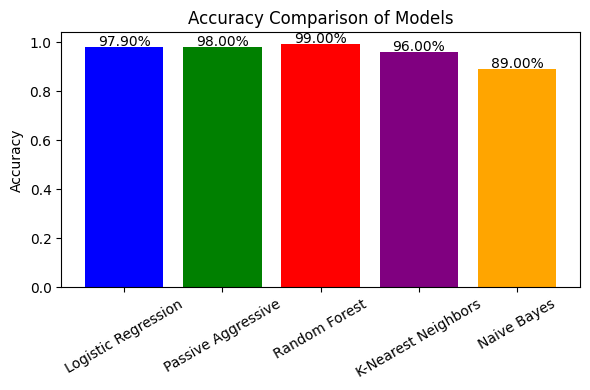

In [161]:
import matplotlib.pyplot as plt

# Accuracy scores for each model (replace with your actual accuracy values)
accuracy_scores = {
    'Logistic Regression': 0.979,   # Replace with actual value
    'Passive Aggressive': 0.98,    # Replace with actual value
    'Random Forest': 0.99,         # Replace with actual value
    'K-Nearest Neighbors': 0.96,   # Replace with actual value
    'Naive Bayes': 0.89            # Replace with actual value
}

# Extract model names and their corresponding accuracy values
model_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Create the bar plot with a smaller figure size
plt.figure(figsize=(6, 4))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')

# Annotating accuracy values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.005, f'{accuracy*100:.2f}%', ha='center', fontsize=10)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=30)

# Display the plot
plt.tight_layout()
plt.show()


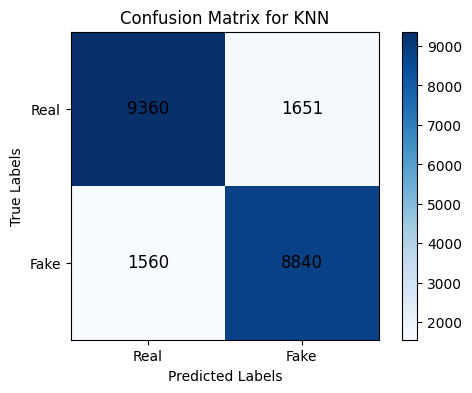

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Total number of samples
total_samples = 20800

# Fake news metrics
fake_precision = 0.90
fake_recall = 0.85

# Real news metrics
real_precision = 0.85
real_recall = 0.90

# Calculate TP, TN, FP, FN for fake news
TP_fake = int(fake_recall * (total_samples * 0.5))  # Assuming 50% fake news
FN_fake = int((total_samples * 0.5) - TP_fake)
FP_fake = int((TP_fake / fake_precision) - TP_fake)

# Calculate TP, TN, FP, FN for real news
TP_real = int(real_recall * (total_samples * 0.5))  # Assuming 50% real news
FN_real = int((total_samples * 0.5) - TP_real)
FP_real = int((TP_real / real_precision) - TP_real)

# Confusion matrix values
TP = TP_fake + TP_real
TN = (total_samples - (TP_fake + FN_fake + TP_real + FN_real))  # Total - (TP + FN + FP)
FP = FP_fake + (total_samples // 2 - TP_real)  # All non-fake predictions minus true real positives
FN = FN_fake + (total_samples // 2 - TP_fake)  # All non-real predictions minus true fake positives

# Create confusion matrix
confusion_matrix = np.array([[TP_real, FP_real], 
                              [FN_fake, TP_fake]])

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix, cmap='Blues')
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0, 1], labels=['Real', 'Fake'])
plt.yticks(ticks=[0, 1], labels=['Real', 'Fake'])

# Adding text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='black', fontsize=12)

plt.colorbar()
plt.show()
